# Average Global Analysis 

---
### Import Dependencies and Setup

In [399]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas
from pathlib import Path
from pprint import pprint
from citipy import citipy

### Load the CSV file 

In [400]:
csv_file = Path("Resources/global_historical_temps.csv")
temp_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
temp_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.25,-0.09,-0.16,-0.10,-0.21,-0.18,-0.1,-0.15,-0.24,-0.22,-0.18,-0.17,***,***,-0.12,-0.17,-0.2
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-0.1,-0.17,0.04,-0.08,-0.19
2,1882,0.16,0.14,0.04,-0.17,-0.15,-0.23,-0.17,-0.07,-0.15,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.09,-0.16,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.08,-0.07,-0.14,-0.22,-0.11,-0.23,-0.11,-0.18,-0.2,-0.34,-0.16,-0.1,-0.19
4,1884,-0.13,-0.08,-0.36,-0.40,-0.34,-0.36,-0.30,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.31,-0.29


----------------
## Clean dataset

<strong>The sections of code in this section are as follows:</strong>

1. Rename certain columnsfor readability
2. Delete rows of years we don't need
3. Print new DataFrame to reflect this code

In [401]:
# Rename columns containing USD to remove ' symbol as it interfers with the code
temp_data = temp_data.rename(columns={"J-D": "Year Average", "DJF": "Dec/Jan/Feb (Summer)", "MAM": "Mar/Apr/May (Autumn)",
                                             "JJA": "Jun/Jul/Aug (Winter)", "SON": "Sep/Oct/Nov (Spring)"})

# Delete unwanted columns but maintain original copy
temp_data = temp_data.drop(columns=['D-N'], inplace=False)

unwanted_temp_data = temp_data[(temp_data['Year'] < 1979) | (temp_data['Year'] > 2022)]
temp_data = temp_data.drop(unwanted_temp_data.index, axis=0)

temp_data = temp_data.astype({"Aug": "float", "Sep": "float", "Oct": "float", "Nov": "float", "Dec": "float",
                             "Year Average": "float", "Dec/Jan/Feb (Summer)": "float", "Jun/Jul/Aug (Winter)": "float", "Sep/Oct/Nov (Spring)": "float", })
#temp_data = temp_data.set_index('Year')
temp_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year Average,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring)
99,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,0.26,0.28,0.48,0.17,0.02,0.13,0.11,0.27
100,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,0.13,0.30,0.22,0.26,0.39,0.32,0.20,0.21
101,1981,0.53,0.42,0.48,0.32,0.25,0.29,0.32,0.35,0.15,0.12,0.23,0.41,0.32,0.39,0.35,0.32,0.17
102,1982,0.05,0.15,0.03,0.15,0.18,0.06,0.15,0.04,0.14,0.13,0.18,0.43,0.14,0.20,0.12,0.08,0.15
103,1983,0.53,0.43,0.42,0.28,0.34,0.23,0.18,0.36,0.37,0.17,0.30,0.17,0.31,0.46,0.34,0.26,0.28


In [402]:
csv_file = Path("Resources/disasterdata.csv")
disaster_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
unwanted_disaster_data = disaster_data[(disaster_data['Year'] > 2022)]
disaster_data = disaster_data.drop(unwanted_disaster_data.index, axis=0)

disaster_data = disaster_data.drop(columns=['Unnamed: 0', 'Disaster Subgroup', 'ISO', 'Continent', 'Latitude', 'Longitude', 'Start Day', 'Total Deaths'])
disaster_data = disaster_data[~disaster_data['Disaster Type'].isin(['Animal accident', 'Complex Disasters', 'Extreme temperature', 'Glacial lake outburst',
                                                                    'Impact', 'Industrial accident', 'Insect infestation', 'Mass movement (dry)',
                                                                    'Miscellaneous accident', 'Transport accident'])]
disaster_data.head()

,Disaster Number,Year,Disaster Group,Disaster Type,Country,Region,Start Month
0,1979-0094-GTM,1979,Natural,Earthquake,Guatemala,Central America,10.0
1,1979-0113-COL,1979,Natural,Earthquake,Colombia,South America,12.0
2,1979-9200-HKG,1979,Natural,Drought,Hong Kong,Eastern Asia,10.0
3,1979-0185-AIA,1979,Natural,Storm,Anguilla,Caribbean,9.0
4,1979-0039-ALB,1979,Natural,Earthquake,Albania,Southern Europe,4.0


In [403]:
merged_df = pd.merge(temp_data, disaster_data, how='inner', on=('Year'))
merged_df.dropna().head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
0,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0094-GTM,Natural,Earthquake,Guatemala,Central America,10.0
1,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0113-COL,Natural,Earthquake,Colombia,South America,12.0
2,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-9200-HKG,Natural,Drought,Hong Kong,Eastern Asia,10.0
3,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0185-AIA,Natural,Storm,Anguilla,Caribbean,9.0
4,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0039-ALB,Natural,Earthquake,Albania,Southern Europe,4.0


# SEPARATE BARCHARTS (SEASONS)

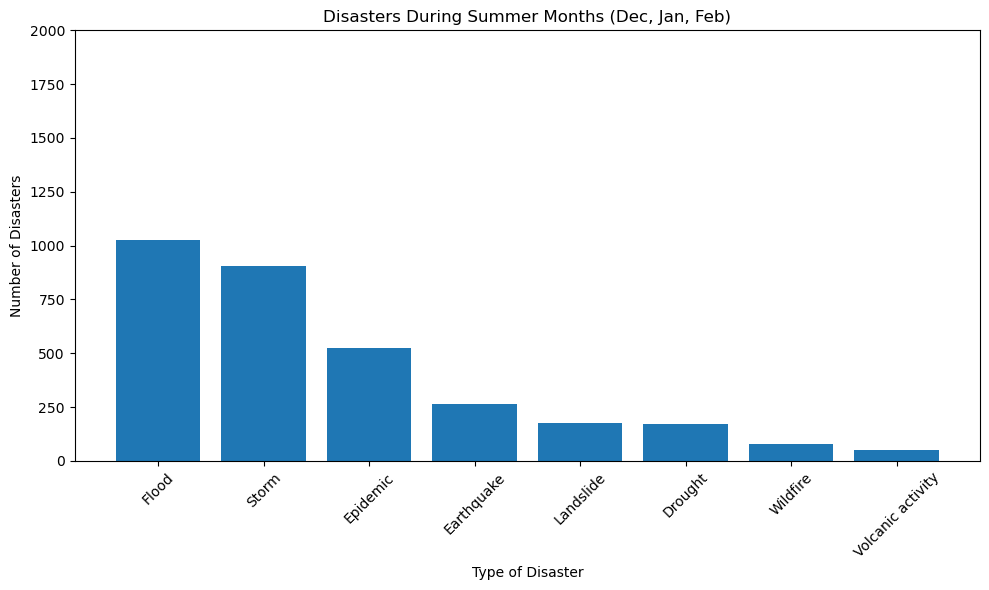

In [404]:
summer_df = merged_df[(merged_df['Start Month'] < 3.0) | (merged_df['Start Month'] > 11.0)]
summer_df.head()

disaster_types = summer_df.groupby(['Disaster Type']).count()
summer_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)
summer_disasters

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
ax1 = plt.bar(summer_disasters.index, summer_disasters.values)
plt.xticks(rotation=45)
plt.xlabel('Type of Disaster')
plt.ylabel('Number of Disasters')
plt.title('Disasters During Summer Months (Dec, Jan, Feb)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 2000)

# Show the plot
plt.tight_layout()
plt.show()

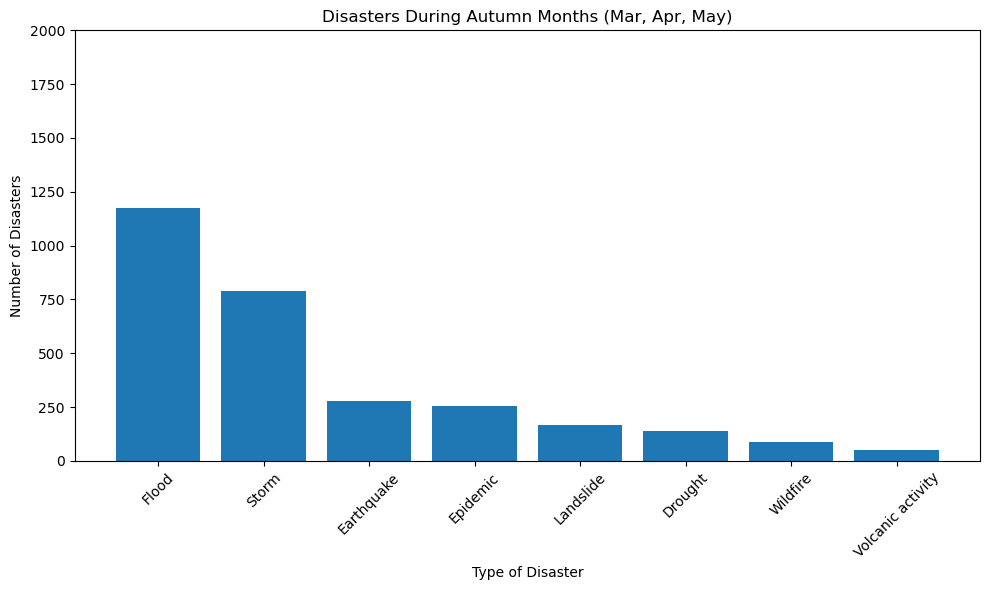

In [405]:
autumn_df = merged_df[(merged_df['Start Month'] < 6.0) & (merged_df['Start Month'] > 2.0)]
autumn_df

disaster_types = autumn_df.groupby(['Disaster Type']).count()
autumn_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)
autumn_disasters

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
ax2 = plt.bar(autumn_disasters.index, autumn_disasters.values)
plt.xticks(rotation=45)
plt.xlabel('Type of Disaster')
plt.ylabel('Number of Disasters')
plt.title('Disasters During Autumn Months (Mar, Apr, May)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 2000)

# Show the plot
plt.tight_layout()
plt.show()

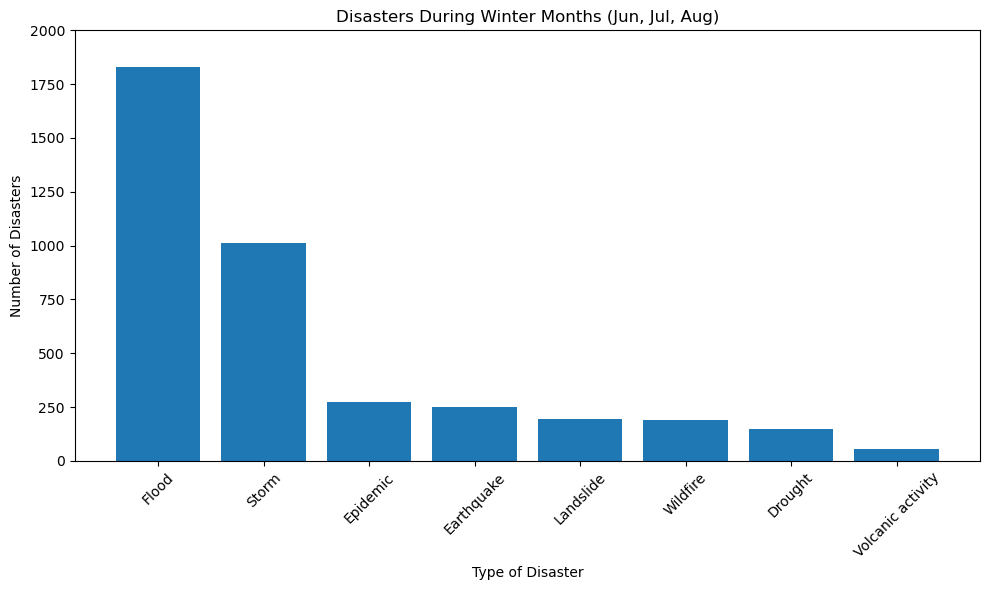

In [406]:
winter_df = merged_df[(merged_df['Start Month'] < 9) & (merged_df['Start Month'] > 5)]
winter_df

disaster_types = winter_df.groupby(['Disaster Type']).count()
winter_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)
winter_disasters

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
ax3 = plt.bar(winter_disasters.index, winter_disasters.values)
plt.xticks(rotation=45)
plt.xlabel('Type of Disaster')
plt.ylabel('Number of Disasters')
plt.title('Disasters During Winter Months (Jun, Jul, Aug)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 2000)

# Show the plot
plt.tight_layout()
plt.show()

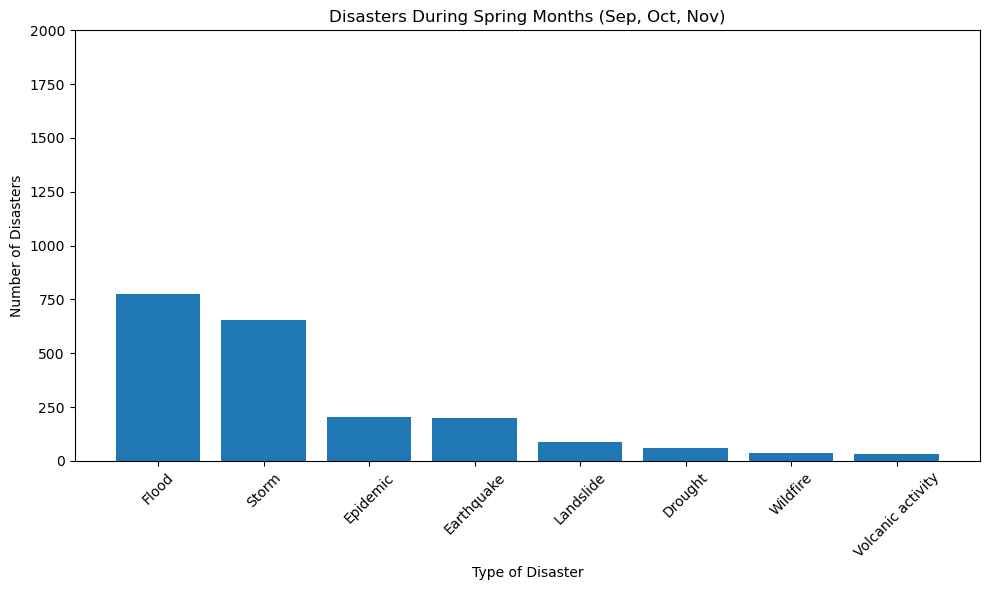

In [407]:
spring_df = merged_df[(merged_df['Start Month'] < 12) & (merged_df['Start Month'] > 9)]
spring_df

disaster_types = spring_df.groupby(['Disaster Type']).count()
spring_disasters = disaster_types['Disaster Number'].sort_values(ascending=False)
spring_disasters

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
ax4 = plt.bar(spring_disasters.index, spring_disasters.values)
plt.xticks(rotation=45)
plt.xlabel('Type of Disaster')
plt.ylabel('Number of Disasters')
plt.title('Disasters During Spring Months (Sep, Oct, Nov)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 2000)

# Show the plot
plt.tight_layout()
plt.show()

# GROUPED BARCHART (SEASONS)

In [408]:
merged_df=merged_df.replace(to_replace=12.0, value='Summer').replace(to_replace=1.0, value='Summer').replace(to_replace=2.0, value='Summer')
merged_df=merged_df.replace(to_replace=3.0, value='Autumn').replace(to_replace=4.0, value='Autumn').replace(to_replace=5.0, value='Autumn')
merged_df=merged_df.replace(to_replace=6.0, value='Winter').replace(to_replace=7.0, value='Winter').replace(to_replace=8.0, value='Winter')
merged_df=merged_df.replace(to_replace=9.0, value='Spring').replace(to_replace=10.0, value='Spring').replace(to_replace=11.0, value='Spring')

seasons_df = merged_df.rename(columns={"Start Month": "Season"})
seasons_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Season
0,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0094-GTM,Natural,Earthquake,Guatemala,Central America,Spring
1,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0113-COL,Natural,Earthquake,Colombia,South America,Summer
2,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-9200-HKG,Natural,Drought,Hong Kong,Eastern Asia,Spring
3,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0185-AIA,Natural,Storm,Anguilla,Caribbean,Spring
4,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0039-ALB,Natural,Earthquake,Albania,Southern Europe,Autumn


In [409]:
# Group data by season and disaster type, and count the number of disasters for each type in each year
seasons_disaster_counts = seasons_df.groupby(['Season', 'Disaster Type']).size().reset_index(name='Count')
seasons_disaster_counts.head()

,Season,Disaster Type,Count
0,Autumn,Drought,139
1,Autumn,Earthquake,278
2,Autumn,Epidemic,256
3,Autumn,Flood,1176
4,Autumn,Landslide,165


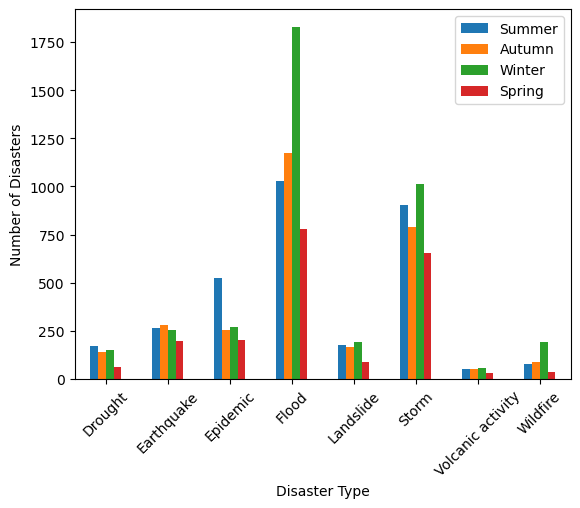

<Figure size 2000x1000 with 0 Axes>

In [410]:
# plot grouped bar chart
season_df = pd.DataFrame({'Summer': summer_disasters, 'Autumn': autumn_disasters,
                   'Winter': winter_disasters,'Spring': spring_disasters,})

ax = season_df.plot.bar(rot=0)
plt.xticks(rotation=45)
plt.xlabel("Disaster Type")
plt.ylabel("Number of Disasters")
plt.legend(['Summer', 'Autumn', 'Winter', 'Spring'])
plt.figure(figsize=(20,10))
plt.show()

# GLOBAL HOTSPOTS

### Floods / Storms / Earthquakes / Epidemics

In [411]:
region_hotspots = merged_df.groupby(['Region', 'Disaster Type']).size().reset_index(name='Count')
region_hotspots.head()

,Region,Disaster Type,Count
0,Australia and New Zealand,Drought,8
1,Australia and New Zealand,Earthquake,8
2,Australia and New Zealand,Epidemic,3
3,Australia and New Zealand,Flood,97
4,Australia and New Zealand,Landslide,3


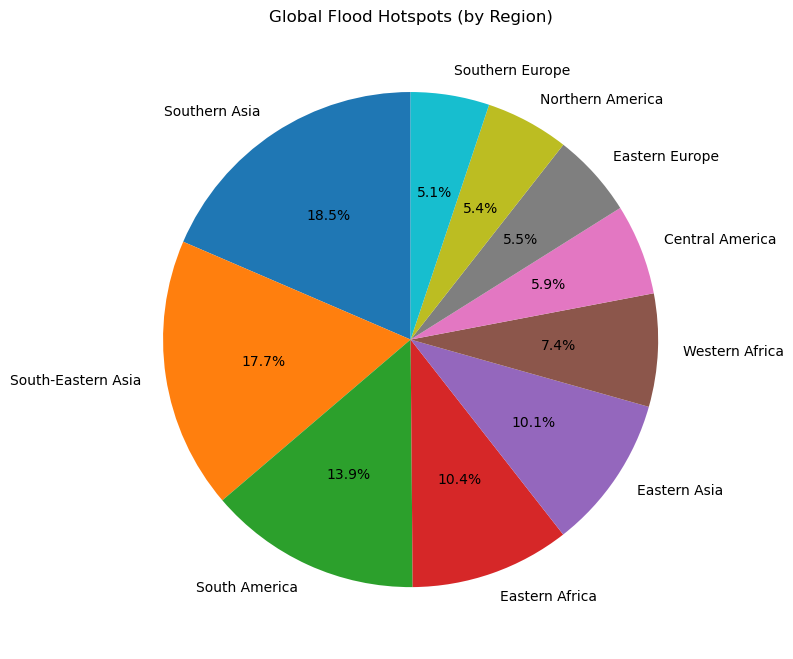

In [455]:
#Flood Hotspots

flood_hotspots = region_hotspots[(region_hotspots['Disaster Type'] == 'Flood')]
flood_hotspots = flood_hotspots.sort_values(by='Count', ascending=False).head(11)

#Top 10 countries with the highest Flood numbers
flood_top_10 = flood_hotspots[(flood_hotspots['Count'] > 200)]

data = {
    'Region': flood_top_10['Region'],
    'Number of Disasters': flood_top_10['Count']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Number of Disasters'], labels=df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Flood Hotspots (by Region)')

#Save the plot
#plt.savefig("Resources/top10Pie.png")

# Show the pie chart
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

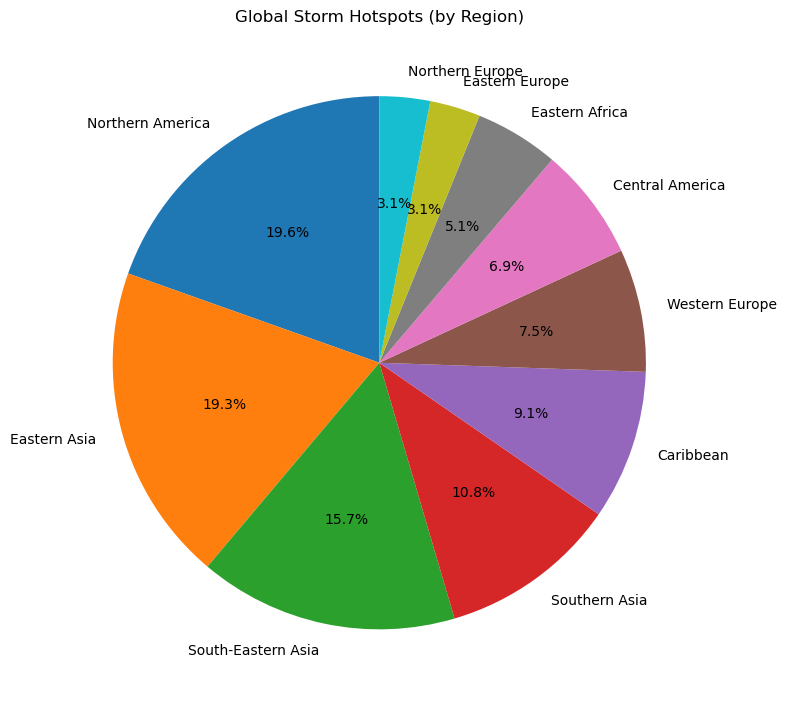

In [456]:
#Storm Hotspots

storm_hotspots = region_hotspots[(region_hotspots['Disaster Type'] == 'Storm')]
storm_hotspots = storm_hotspots.sort_values(by='Count', ascending=False).head(11)

# Top 10 countries with the highest Flood numbers
storm_top_10 = storm_hotspots[(storm_hotspots['Count'] > 99)]

data = {
    'Region': storm_top_10['Region'],
    'Number of Disasters': storm_top_10['Count']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Number of Disasters'], labels=df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Storm Hotspots (by Region)')

#Save the plot
#plt.savefig("Resources/top10Pie.png")

# Show the pie chart
plt.tight_layout()
plt.show()

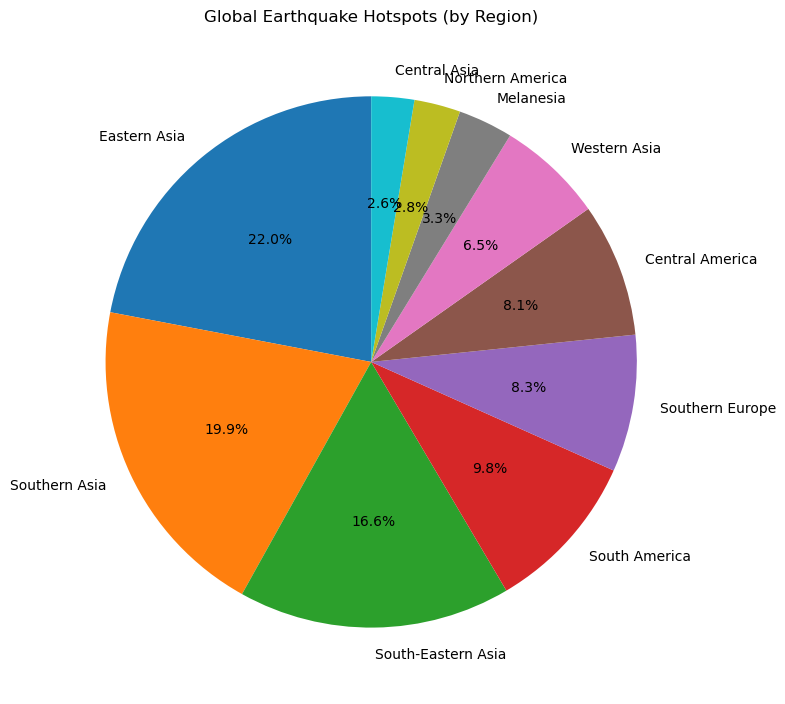

In [414]:
#Earthquake Hotspots

earthquake_hotspots = region_hotspots[(region_hotspots['Disaster Type'] == 'Earthquake')]
earthquake_hotspots = earthquake_hotspots.sort_values(by='Count', ascending=False).head(11)

# Top 10 countries with the highest Flood numbers
earthquake_top_10 = earthquake_hotspots[(earthquake_hotspots['Count'] > 24)]

data = {
    'Region': earthquake_top_10['Region'],
    'Number of Disasters': earthquake_top_10['Count']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Number of Disasters'], labels=df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Earthquake Hotspots (by Region)')

#Save the plot
#plt.savefig("Resources/top10Pie.png")

# Show the pie chart
plt.tight_layout()
plt.show()

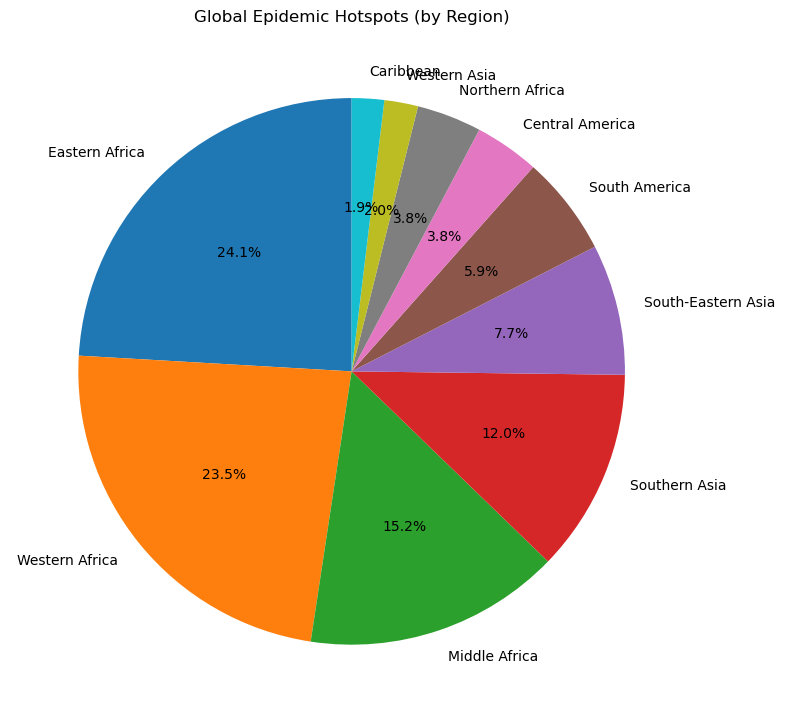

In [415]:
#Epidemic Hotspots

epidemic_hotspots = region_hotspots[(region_hotspots['Disaster Type'] == 'Epidemic')]
epidemic_hotspots = epidemic_hotspots.sort_values(by='Count', ascending=False).head(11)

# Top 10 countries with the highest Flood numbers
epidemic_top_10 = epidemic_hotspots[(epidemic_hotspots['Count'] > 23)]

data = {
    'Region': epidemic_top_10['Region'],
    'Number of Disasters': epidemic_top_10['Count']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(df['Number of Disasters'], labels=df['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Global Epidemic Hotspots (by Region)')

#Save the plot
#plt.savefig("Resources/top10Pie.png")

# Show the pie chart
plt.tight_layout()

plt.show()

# CORRELATIONS

### OVERALL DISASTERS VS. TIME 

In [416]:
no_disasters = merged_df.groupby(['Year']).count()['Disaster Number']
#no_disasters
average_temp = merged_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\2021757786.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = merged_df.groupby(['Year']).mean()['Year Average']


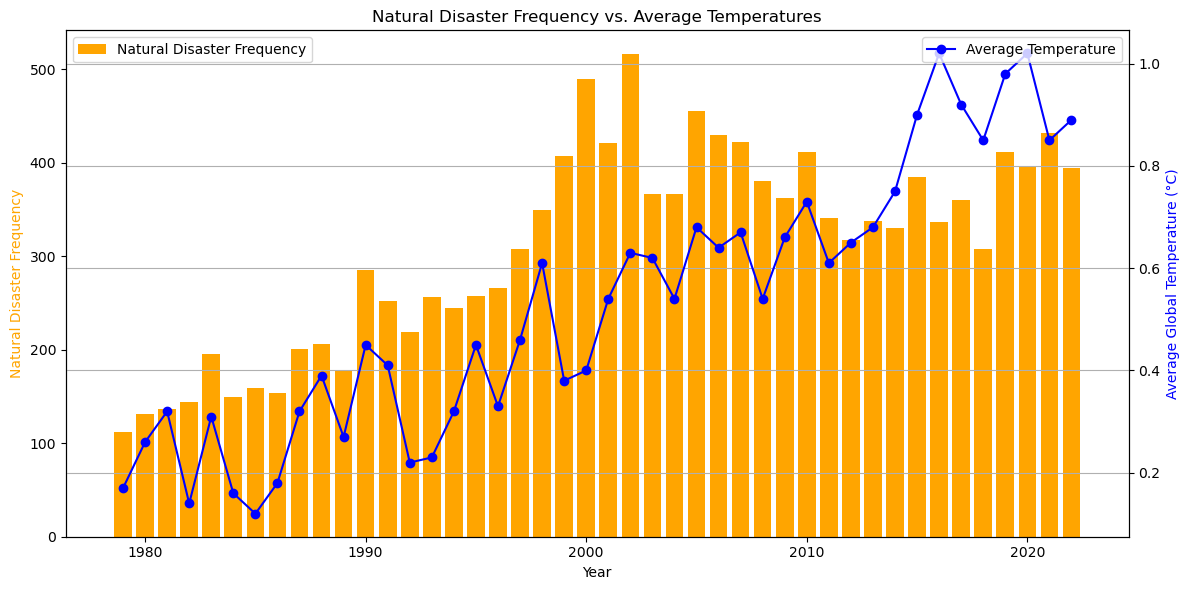

In [417]:
disaster_plot_data = no_disasters
# disaster_plot_data
temp_plot_data = average_temp
#temp_plot_data

# Create a figure and the first subplot (Natural Disaster Frequency)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Natural Disaster Frequency data on the first subplot
ax1.bar(disaster_plot_data.index, disaster_plot_data.values, color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Natural Disaster Frequency', color='orange')
ax1.set_title('Natural Disaster Frequency vs. Average Temperatures')

# Create a second subplot that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Average Temperatures data on the second subplot
ax2.plot(temp_plot_data.index, temp_plot_data.values, marker='o', linestyle='-', color='blue')
ax2.set_ylabel('Average Global Temperature (°C)', color='blue')

# Add a legend for each subplot
ax1.legend(['Natural Disaster Frequency'], loc='upper left')
ax2.legend(['Average Temperature'], loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Save the plot
plt.savefig("Resources/combinedDisastervsTemp.png")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The r-value is 0.73


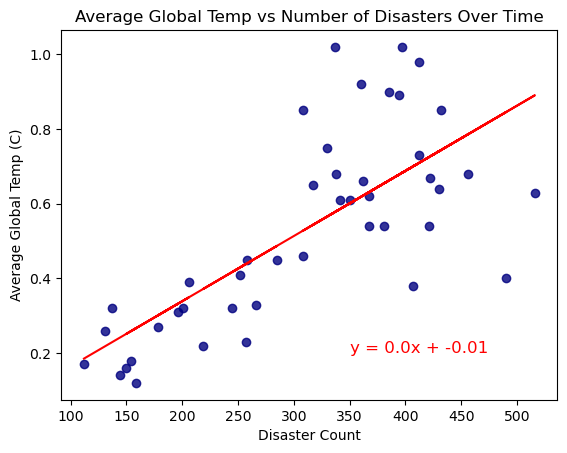

In [457]:
plt.scatter(no_disasters, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_disasters
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Disaster Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Disasters Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (350, 0.2), fontsize=12, color='red')
plt.show()

# Floods

In [419]:
flood_df = merged_df[merged_df['Disaster Type'] == 'Flood']
flood_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
5,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0044-ARG,Natural,Flood,Argentina,South America,Autumn
11,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0109-BLZ,Natural,Flood,Belize,Central America,Summer
13,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0003-BRA,Natural,Flood,Brazil,South America,Summer
14,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0195-CAN,Natural,Flood,Canada,Northern America,Autumn
20,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0099-COL,Natural,Flood,Colombia,South America,Spring


In [420]:
no_floods = flood_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = flood_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\2838722683.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = flood_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

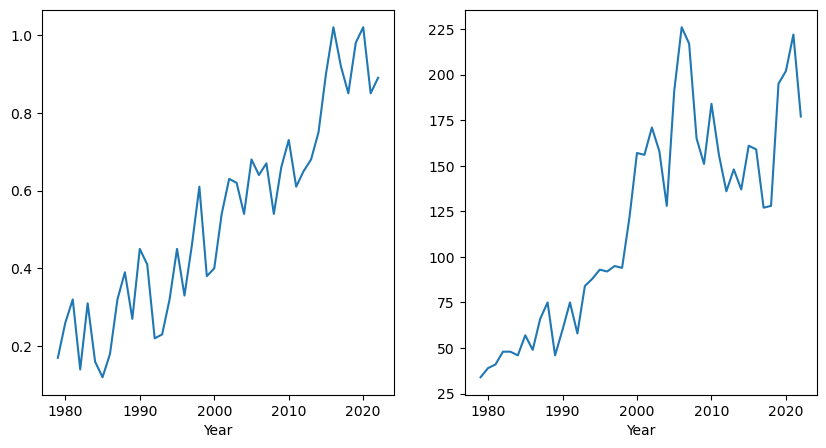

In [421]:
flood_plot_data = no_floods
temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
flood_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

The r-value is 0.81


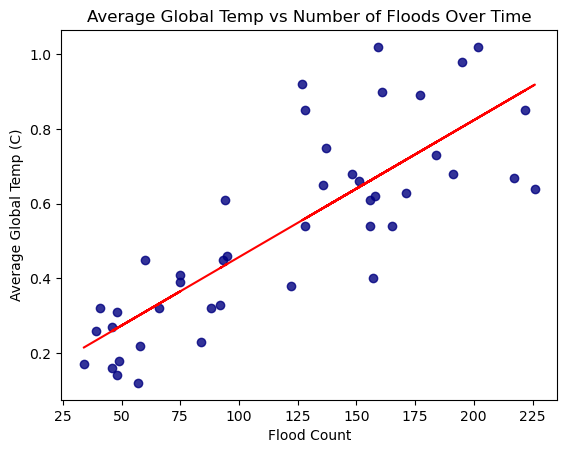

In [422]:
plt.scatter(no_floods, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_floods
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Flood Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Floods Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Earthquakes

In [423]:
earthquake_df = merged_df[merged_df['Disaster Type'] == 'Earthquake']
earthquake_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
0,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0094-GTM,Natural,Earthquake,Guatemala,Central America,Spring
1,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0113-COL,Natural,Earthquake,Colombia,South America,Summer
4,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0039-ALB,Natural,Earthquake,Albania,Southern Europe,Autumn
16,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0063-CHN,Natural,Earthquake,China,Eastern Asia,Winter
17,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0082-CHN,Natural,Earthquake,China,Eastern Asia,Winter


In [424]:
no_earthquakes = earthquake_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = earthquake_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\1042733503.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = earthquake_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

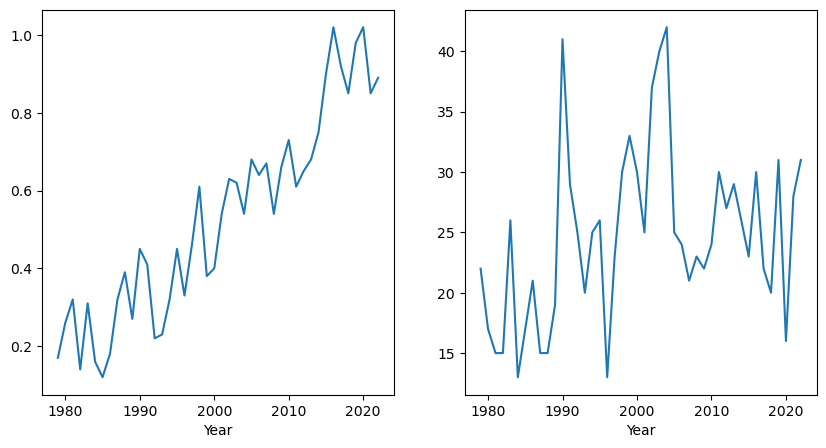

In [425]:
earthquake_plot_data = no_earthquakes

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
earthquake_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

The r-value is 0.34


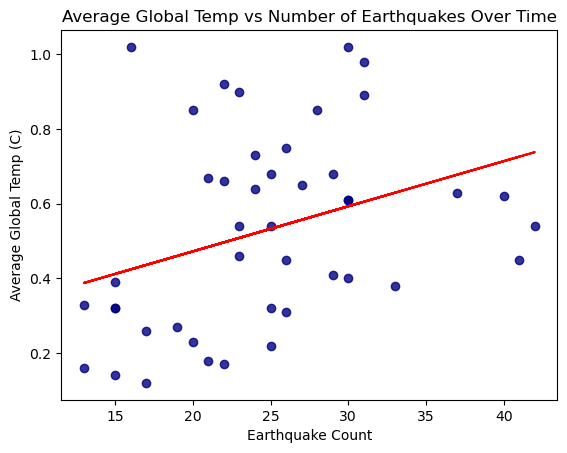

In [426]:
plt.scatter(no_earthquakes, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_earthquakes
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Earthquake Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Earthquakes Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Storms

In [427]:
storm_df = merged_df[merged_df['Disaster Type'] == 'Storm']
storm_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
3,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0185-AIA,Natural,Storm,Anguilla,Caribbean,Spring
6,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0242-AUS,Natural,Storm,Australia,Australia and New Zealand,Autumn
8,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0048-BGD,Natural,Storm,Bangladesh,Southern Asia,Autumn
9,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0078-BGD,Natural,Storm,Bangladesh,Southern Asia,Winter
21,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0069-DMA,Natural,Storm,Dominica,Caribbean,Winter


In [428]:
no_storms = storm_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = storm_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\1095656410.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = storm_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

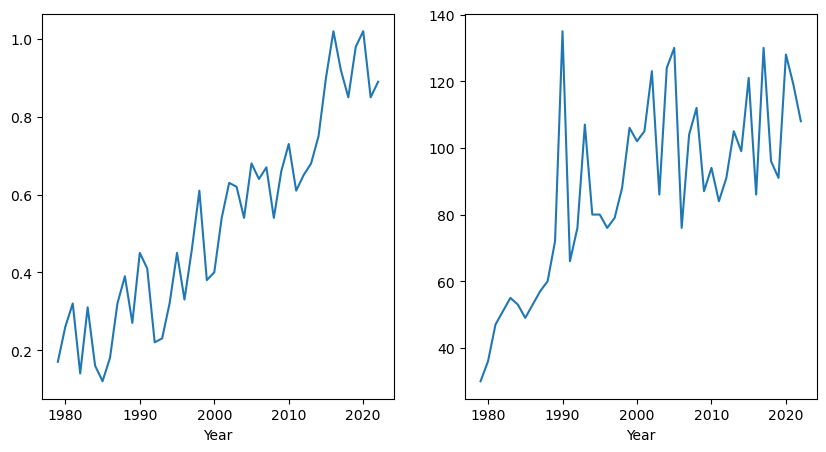

In [429]:
storm_plot_data = no_storms

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
storm_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

The r-value is 0.67


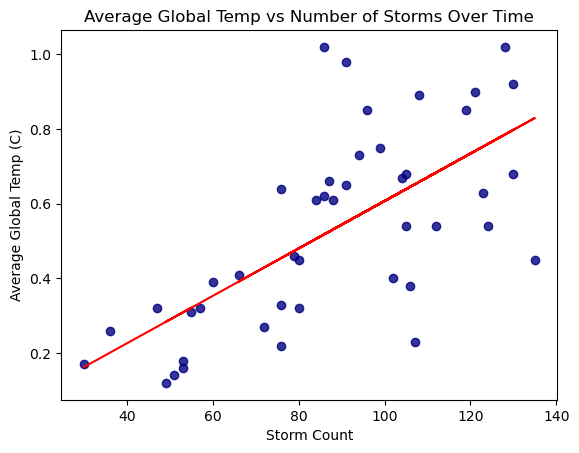

In [430]:
plt.scatter(no_storms, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_storms
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Storm Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Storms Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Wildfires

In [431]:
wildfire_df = merged_df[merged_df['Disaster Type'] == 'Wildfire']
wildfire_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
74,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0023-MMR,Natural,Wildfire,Myanmar,South-Eastern Asia,Summer
130,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,...,0.39,0.32,0.20,0.21,1980-0211-CAN,Natural,Wildfire,Canada,Northern America,Winter
264,1981,0.53,0.42,0.48,0.32,0.25,0.29,0.32,0.35,0.15,...,0.39,0.35,0.32,0.17,1981-0233-CHN,Natural,Wildfire,China,Eastern Asia,Autumn
324,1981,0.53,0.42,0.48,0.32,0.25,0.29,0.32,0.35,0.15,...,0.39,0.35,0.32,0.17,1981-0045-MMR,Natural,Wildfire,Myanmar,South-Eastern Asia,Autumn
414,1982,0.05,0.15,0.03,0.15,0.18,0.06,0.15,0.04,0.14,...,0.20,0.12,0.08,0.15,1982-0304-FRA,Natural,Wildfire,France,Western Europe,Winter


In [432]:
no_wildfires = wildfire_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = wildfire_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\2973139078.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = wildfire_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

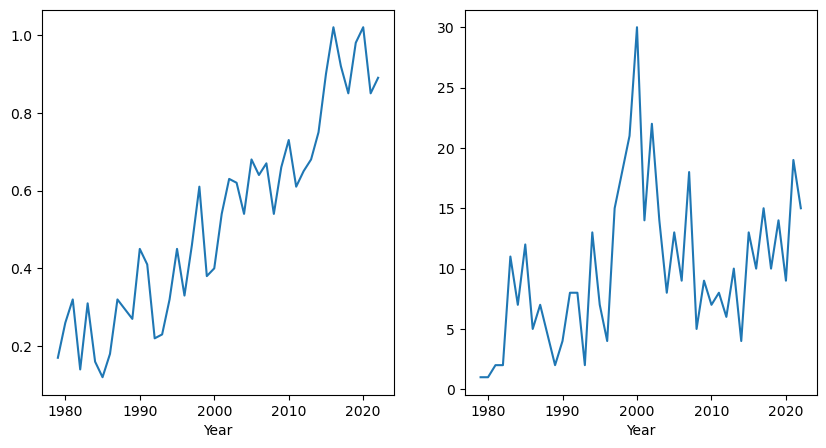

In [433]:
wildfire_plot_data = no_wildfires

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
wildfire_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

The r-value is 0.36


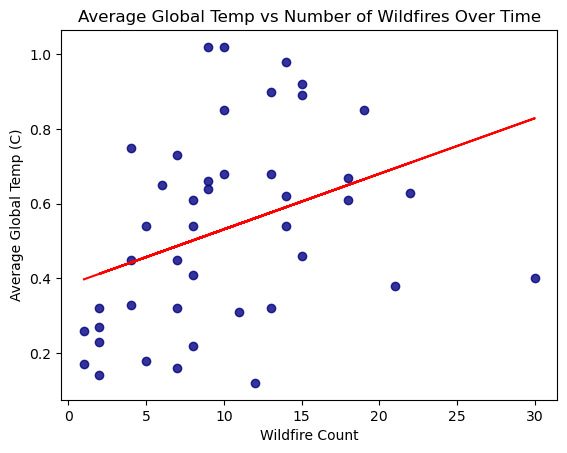

In [434]:
plt.scatter(no_wildfires, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_wildfires
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Wildfire Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Wildfires Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Volcanic Activity

In [435]:
volcano_df = merged_df[merged_df['Disaster Type'] == 'Volcanic activity']
volcano_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
44,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0027-IDN,Natural,Volcanic activity,Indonesia,South-Eastern Asia,Summer
45,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0269-IDN,Natural,Volcanic activity,Indonesia,South-Eastern Asia,Autumn
63,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0087-ITA,Natural,Volcanic activity,Italy,Southern Europe,Spring
107,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0035-VCT,Natural,Volcanic activity,Saint Vincent and the Grenadines,Caribbean,Autumn
161,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,...,0.39,0.32,0.20,0.21,1980-0317-IDN,Natural,Volcanic activity,Indonesia,South-Eastern Asia,Spring


In [436]:
no_volcanos = volcano_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = volcano_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\1044040848.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = volcano_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

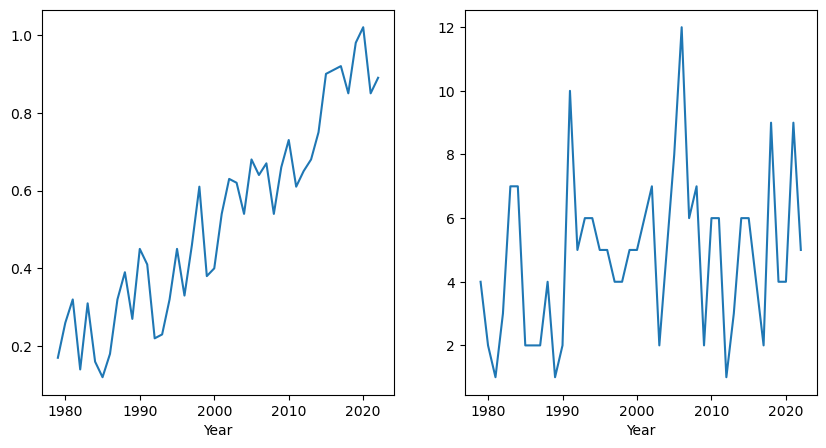

In [437]:
wildfire_plot_data = no_volcanos

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
wildfire_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

The r-value is 0.23


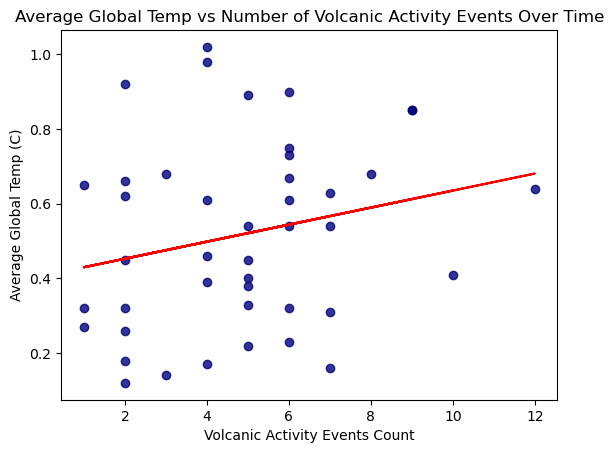

In [438]:
plt.scatter(no_volcanos, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_volcanos
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Volcanic Activity Events Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Volcanic Activity Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Landslides

In [439]:
landslide_df = merged_df[merged_df['Disaster Type'] == 'Landslide']
landslide_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
15,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0247-CHL,Natural,Landslide,Chile,South America,Spring
32,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0206-HKG,Natural,Landslide,Hong Kong,Eastern Asia,Winter
46,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0262-IDN,Natural,Landslide,Indonesia,South-Eastern Asia,Autumn
50,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0030-IND,Natural,Landslide,India,Southern Asia,Autumn
51,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0079-IND,Natural,Landslide,India,Southern Asia,Winter


In [440]:
no_landslides = landslide_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = landslide_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\320670103.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = landslide_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

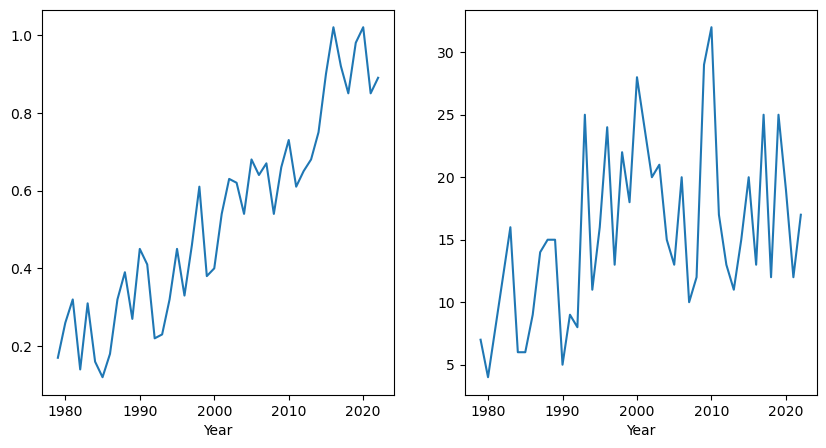

In [441]:
landslide_plot_data = no_landslides

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
landslide_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

The r-value is 0.41


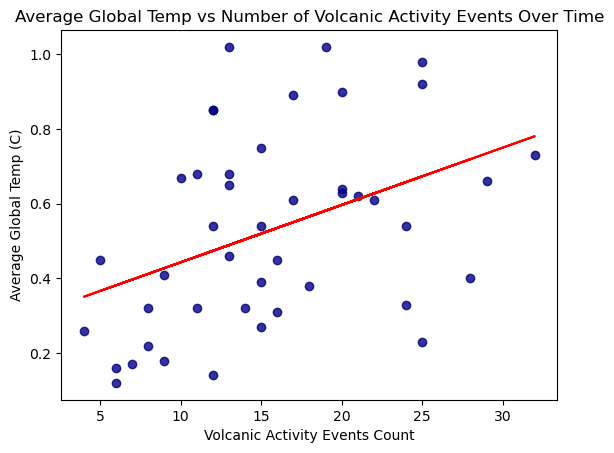

In [442]:
plt.scatter(no_landslides, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_landslides
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Volcanic Activity Events Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Volcanic Activity Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Drought

In [443]:
drought_df = merged_df[merged_df['Disaster Type'] == 'Drought']
drought_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
2,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-9200-HKG,Natural,Drought,Hong Kong,Eastern Asia,Spring
10,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-9270-BGD,Natural,Drought,Bangladesh,Southern Asia,Winter
12,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-9012-BRA,Natural,Drought,Brazil,South America,NaN
18,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-9004-CHN,Natural,Drought,China,Eastern Asia,NaN
37,1979,0.09,-0.1,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-9177-KEN,Natural,Drought,Kenya,Eastern Africa,NaN


In [444]:
no_droughts = drought_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = drought_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\2040503219.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = drought_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

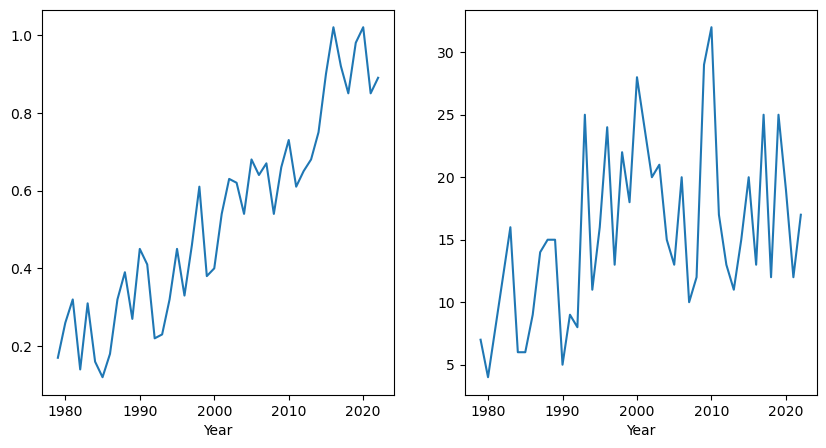

In [445]:
drought_plot_data = no_droughts

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
landslide_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

The r-value is 0.34


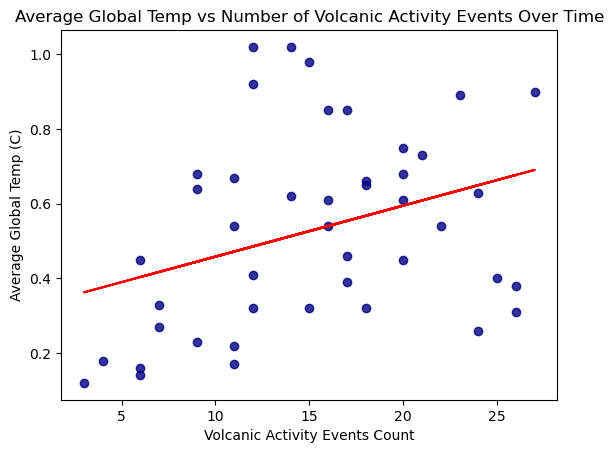

In [446]:
plt.scatter(no_droughts, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_droughts
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Volcanic Activity Events Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Volcanic Activity Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

# Epidemic

In [447]:
epidemic_df = merged_df[merged_df['Disaster Type'] == 'Epidemic']
epidemic_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Dec/Jan/Feb (Summer),Mar/Apr/May (Autumn),Jun/Jul/Aug (Winter),Sep/Oct/Nov (Spring),Disaster Number,Disaster Group,Disaster Type,Country,Region,Start Month
7,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0020-BFA,Natural,Epidemic,Burkina Faso,Western Africa,Summer
53,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0266-IND,Natural,Epidemic,India,Southern Asia,Winter
73,1979,0.09,-0.10,0.19,0.15,0.04,0.14,0.04,0.17,0.25,...,0.02,0.13,0.11,0.27,1979-0002-MLI,Natural,Epidemic,Mali,Western Africa,Summer
146,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,...,0.39,0.32,0.20,0.21,1980-0130-ETH,Natural,Epidemic,Ethiopia,Eastern Africa,Autumn
169,1980,0.30,0.39,0.30,0.30,0.35,0.21,0.22,0.19,0.21,...,0.39,0.32,0.20,0.21,1980-0061-IND,Natural,Epidemic,India,Southern Asia,Winter


In [448]:
no_epidemics = epidemic_df.groupby(['Year']).count()['Disaster Number']
#no_floods
average_temp = epidemic_df.groupby(['Year']).mean()['Year Average']
#average_temp

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\741771255.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_temp = epidemic_df.groupby(['Year']).mean()['Year Average']


<Axes: xlabel='Year'>

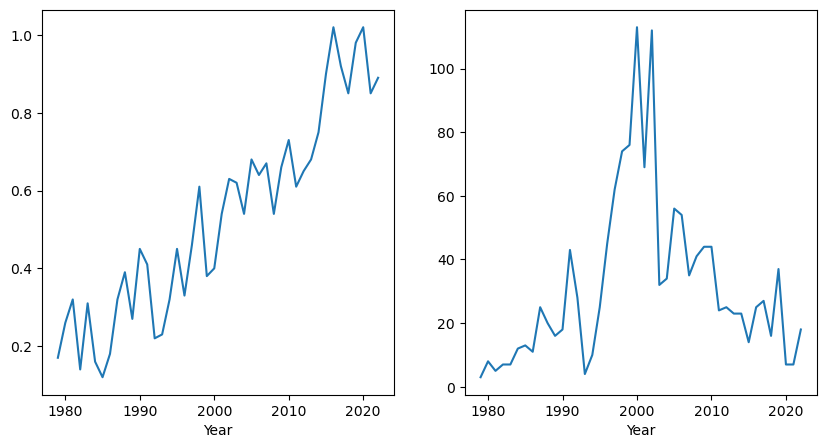

In [449]:
epidemic_plot_data = no_epidemics

temp_plot_data = average_temp

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
#ax2=ax.twinx()
epidemic_plot_data.plot(ax=axes[1])
temp_plot_data.plot(ax=axes[0])

The r-value is 0.13


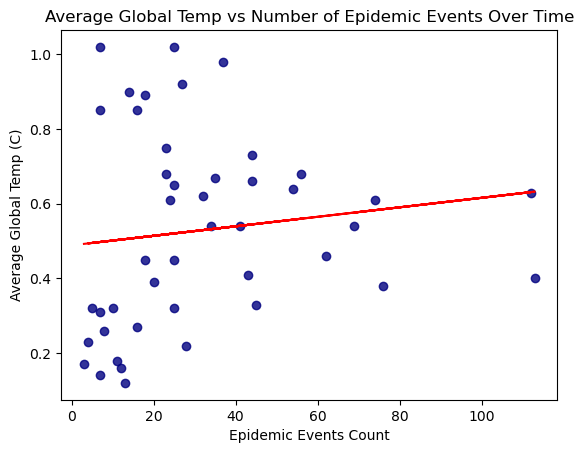

In [450]:
plt.scatter(no_epidemics, average_temp, marker='o', color='navy', alpha=0.8)
x_values = no_epidemics
y_values =  average_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('Epidemic Events Count')
plt.ylabel('Average Global Temp (C)')
plt.title('Average Global Temp vs Number of Epidemic Events Over Time')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (550, 0.2), fontsize=12, color='red')
plt.show()

In [451]:
# Group data by year and disaster type, and count the number of disasters for each type in each year
disaster_counts = disaster_data.groupby(['Year', 'Disaster Type']).size().reset_index(name='Count')

# Create a DataFrame to store the total number of disasters per year
total_disasters = disaster_counts.groupby('Year')['Count'].sum().reset_index()

# Merge the total_disasters DataFrame with the original disaster_counts DataFrame
merged_df = pd.merge(disaster_counts, total_disasters, on='Year', suffixes=('', '_Total'))

# Rename columns for clarity
merged_df = merged_df.rename(columns={'Count_Total': 'Total_Disasters'})

# Display the DataFrame
merged_df

,Year,Disaster Type,Count,Total_Disasters
0,1979,Drought,11,112
1,1979,Earthquake,22,112
2,1979,Epidemic,3,112
3,1979,Flood,34,112
4,1979,Landslide,7,112
...,...,...,...,...
345,2022,Flood,177,394
346,2022,Landslide,17,394
347,2022,Storm,108,394
348,2022,Volcanic activity,5,394


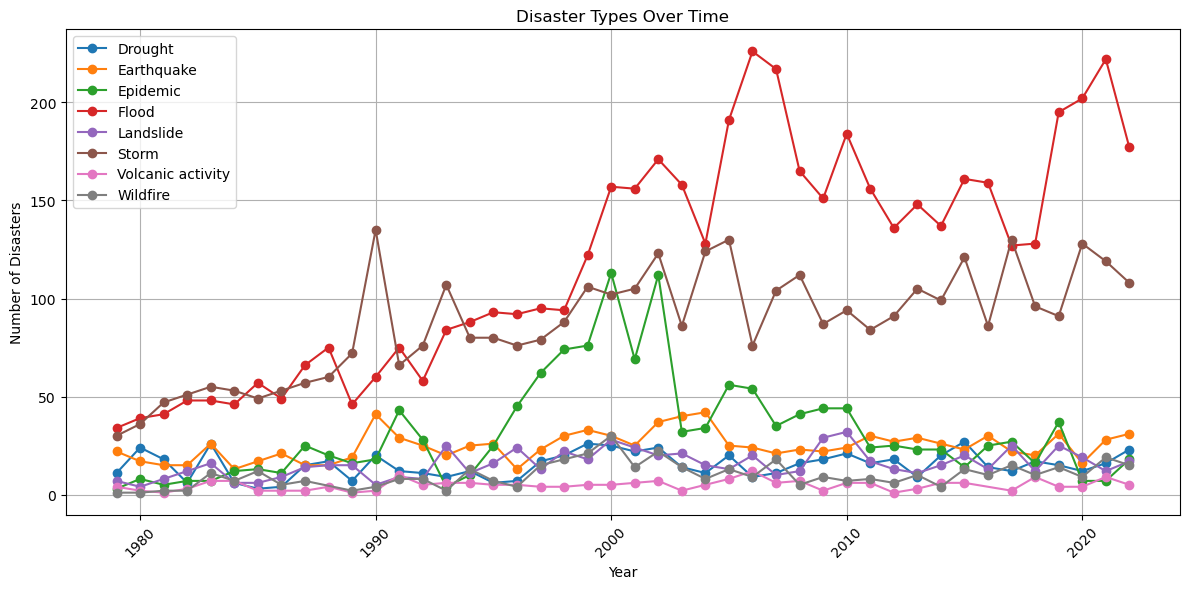

In [452]:
# Create a line chart with multiple lines
plt.figure(figsize=(12, 6))

# Create lines for each disaster type
for disaster_type in merged_df['Disaster Type'].unique():
    subset = merged_df[merged_df['Disaster Type'] == disaster_type]
    plt.plot(subset['Year'], subset['Count'], marker='o', label=disaster_type)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Disaster Types Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

#Save the plot
plt.savefig("Resources/disasterTypeOverTime.png")

# Show the line chart
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

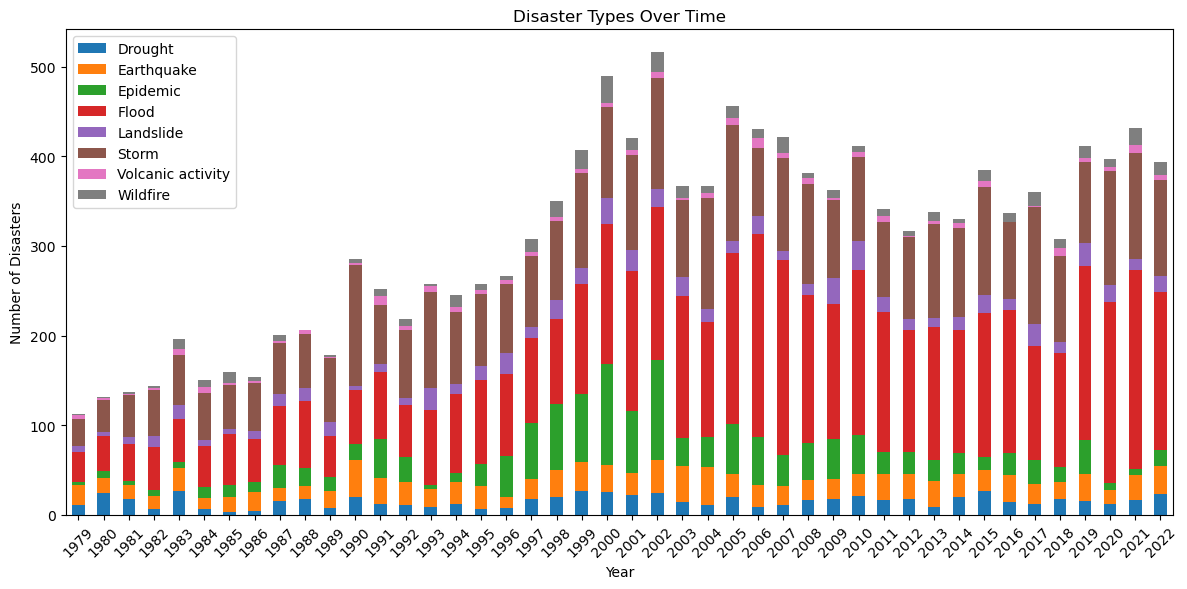

In [453]:
# Pivot the DataFrame to get disaster types as columns
stacked_disaster_df = merged_df.pivot(index='Year', columns='Disaster Type', values='Count').fillna(0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Plot the stacked bars
stacked_disaster_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Disaster Types Over Time')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

#Save the plot
plt.savefig("Resources/stackedBarChart.png")

# Show the stacked bar chart
plt.tight_layout()
plt.show()